In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.src.common.enums.enum import (
    MapLayerType,
    ObjectSize,
    GateType,
    TemplateTypes,
    ObjectRotation,
    YamlReplacementKeywords,
    CheckPlacementReturnTypes,
)

from aoe2mapgenerator.src.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.src.common.constants.constants import (
    DEFAULT_EMPTY_VALUE,
    BASE_SCENE_DIR_LINUX,
    BASE_SCENARIO_NAME,
    TEMPLATE_DIR_LINUX,
)
from aoe2mapgenerator.src.common.constants.default_objects import (
    GHOST_OBJECT_DISPLACEMENT,
)
from aoe2mapgenerator.src.common.enums.enum import GateType
import multiprocessing as mp
from aoe2mapgenerator.src.map.map import Map
import os
from aoe2mapgenerator.src.serializer.serializer import (
    _convert_map_value_to_string,
    _get_enum_list,
    _recursive_parse_enum_to_string,
    serialize_map,
    get_all_functions_and_arguments,
    _get_functions,
    _get_function_arguments,
    _get_default_arguments,
    _convert_enum_instance_to_string,
)
from aoe2mapgenerator.src.triggers.triggers import TriggerManager
from aoe2mapgenerator.src.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum
from aoe2mapgenerator.src.units.wallgenerators.voronoi import VoronoiGenerator
from AoE2ScenarioParser.scenarios.aoe2_de_scenario import AoE2DEScenario
from aoe2mapgenerator.src.units.placers.statictemplate import TemplateCreator
from aoe2mapgenerator.src.units.placers.group_placer import GroupPlacerManager
from aoe2mapgenerator.src.units.placers.point_manager import PointManager
from aoe2mapgenerator.src.testing import awesome_function
from aoe2mapgenerator.src.map.map_object import MapObject
from aoe2mapgenerator.src.units.placers.point_selector import PointSelector
from aoe2mapgenerator.src.visualizer.visualizer import Visualizer
from aoe2mapgenerator.src.units.placers.gate_placer import GatePlacer
from aoe2mapgenerator.src.units.placers.wall_placer import WallPlacer
from aoe2mapgenerator.src.map.map_manager import MapManager
from aoe2mapgenerator.src.units.placers.placer_configs import *
from aoe2mapgenerator.src.units.placers.placer_configs import PlaceGroupsConfig
import dataclasses
import json

ModuleNotFoundError: No module named 'aoe2mapgenerator.common'

In [51]:
# import cProfile
# data = cProfile.run('vor_gen.generate_voronoi_cells(point_manager=point_manager_2, interpoint_distance=2, map_layer_type=MapLayerType.UNIT)')

In [74]:
n = 100
map_manager = MapManager(n)

In [75]:
point_manager = PointManager()
point_selector = PointSelector(map_manager.get_map())
point_manager.add_points([(i, j) for i in range(n) for j in range(n)])

In [76]:
zones = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_manager=point_manager,
        interpoint_distance=15,
        map_layer_type=MapLayerType.TERRAIN,
    )
)

In [77]:
terrains = [
    TerrainId.ICE,
    TerrainId.SNOW_STRONG,
    TerrainId.DESERT_CRACKED,
    TerrainId.FOREST_PINE,
    TerrainId.FOREST_AUTUMN,
]

In [78]:
for zone in zones:
    points = point_selector.get_points_from_map_layer(
        PointSelectorConfig(MapLayerType.TERRAIN, zone)
    )
    point_manager = PointManager()
    point_manager.add_points(points)
    terrain = random.choice(terrains)

    map_manager.place_groups(
        PlaceGroupsConfig(
            point_manager=point_manager,
            map_layer_type=MapLayerType.TERRAIN,
            object_type=terrain,
            player_id=PlayerId.GAIA,
            group_size=150,
            groups=10,
            clumping=15,
        )
    )

In [79]:
zones = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_manager=point_manager,
        interpoint_distance=50,
        map_layer_type=MapLayerType.UNIT,
    )
)

point_manager.clear()
points = map_manager.get_points_from_map_layer(
    PointSelectorConfig(
        map_layer_type=MapLayerType.TERRAIN,
        object_type=MapObject(TerrainId.ICE, PlayerId.GAIA),
    )
)

point_manager.add_points(points)

# point_manager = PointManager()
# point_selector = PointSelector(map_manager.get_map())
# point_manager.clear()
# point_manager.add_points([(i,j) for i in range(n) for j in range(n)])


map_manager.place_borders(
    AddBordersConfig(
        point_manager=point_manager,
        map_layer_type=MapLayerType.UNIT,
        obj_type=BuildingInfo.CITY_WALL,
        player_id=PlayerId.ONE,
        margin=1,
    )
)

In [80]:
point_manager.clear()
points = map_manager.get_points_from_map_layer(
    PointSelectorConfig(
        map_layer_type=MapLayerType.UNIT,
        object_type=MapObject(BuildingInfo.CITY_WALL, PlayerId.ONE),
    )
)

point_manager.add_points(points)

In [81]:
gate_placer = GatePlacer(aoe2_map=map_manager.get_map())

In [82]:
gate_placer.place_gate_on_four_sides(
    point_manager=point_manager,
    map_layer_type=MapLayerType.UNIT,
    gate_type=GateType.CITY_GATE,
    player_id=PlayerId.ONE,
)

In [83]:
# map_manager.place_groups(PlaceGroupsConfig(
#     point_manager=point_manager,
#     map_layer_type=MapLayerType.UNIT,
#     object_type=UnitInfo.LEGIONARY,
#     player_id=PlayerId.ONE,
#     group_size=150,
#     groups=10,
#     clumping=15
#     ))

In [84]:
# n = 200
# map_manager = MapManager(n)

# point_manager = PointManager()
# point_manager.add_points([(i, j) for i in range(n) for j in range(n)])

# groups = 10
# group_size = 10
# total = groups * group_size

# configuration = PlaceGroupsConfig(anchor
#     player_id=PlayerId.ONE,
#     groups=groups,
#     group_size=group_size,
#     clumping=10
# )
# map_manager.place_groups(configuration)

# values = map_manager.get_set_with_map_object(
#     map_layer_type=MapLayerType.UNIT,
#     obj=MapObject(UnitInfo.ALFRED_THE_ALPACA, PlayerId.ONE),
# )

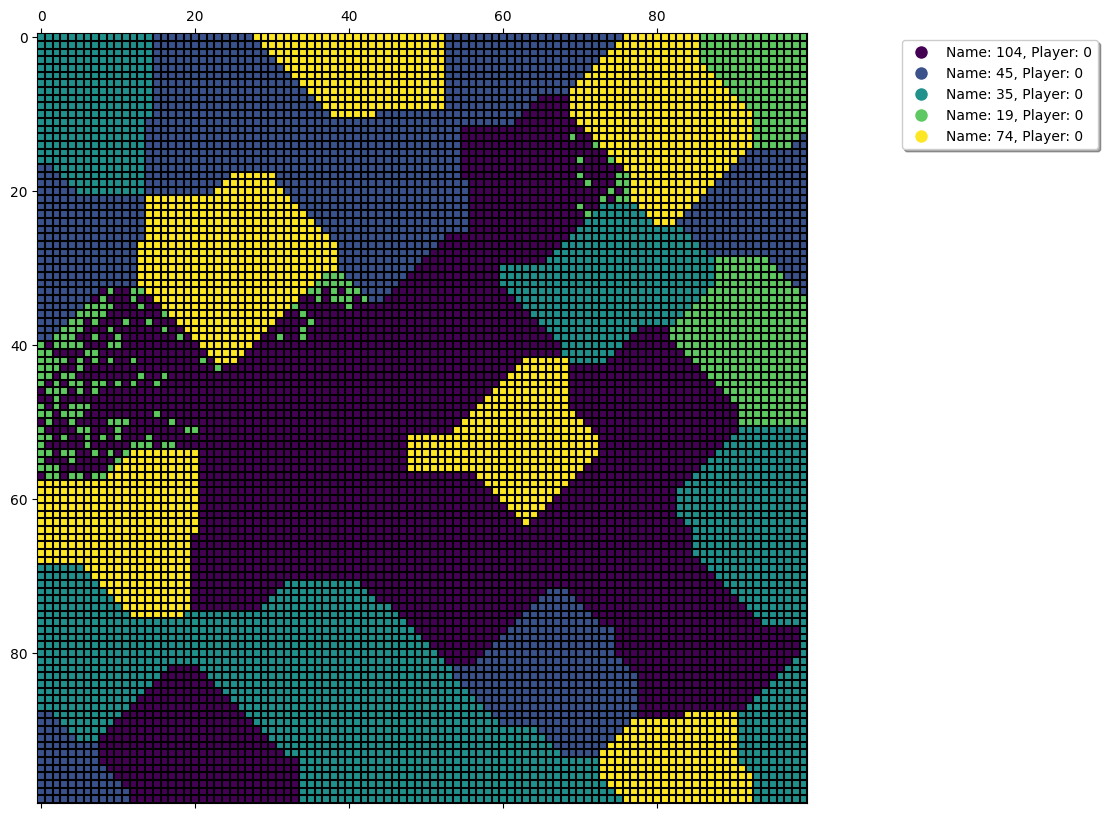

In [89]:
map_manager.visualize_map(
    VisualizeMapConfig(
        map_layer_type=MapLayerType.TERRAIN,
        fig_size=(10, 10),
        include_legend=True,
        anchor=(1.25, 1),
        transpose=True,
    )
)

In [86]:
scen = Scenario(aoe2_map=map_manager.get_map())


[10:23:44] Reading file: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/BASE_SCENARIO.aoe2scenario'
[10:23:44] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.53
>>> Scenario variant: 'Age of Empires 2'
##########################################

[10:23:44] Loading scenario structure finished successfully.
[10:23:44] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[10:23:46] Parsing scenario file finished successfully.

[10:23:46] Setting up managers ...

In [87]:
scen.write_map()

In [88]:
scen.save_file(os.path.join(BASE_SCENE_DIR_LINUX, "test_scenario3.aoe2scenario"))


[10:23:50] Reconstructing sections and structs from managers...
	✔ MessageManagerssageManager...
	✔ PlayerManagerlayerManager...
	✔ MapManagerg MapManager...
	✔ UnitManager UnitManager...
	✔ TriggerManageriggerManager...
	✔ XsManagerng XsManager...
[10:23:51] Reconstruction finished successfully.

[10:23:51] File writing from structure started...
	✔ FileHeaderg FileHeader...
	✔ DataHeaderg DataHeader...
	✔ Messagesing Messages...
	✔ Cinematicsg Cinematics...
	✔ BackgroundImagekgroundImage...
	✔ PlayerDataTwolayerDataTwo...
	✔ GlobalVictorylobalVictory...
	✔ Diplomacyng Diplomacy...
	✔ Optionsting Options...
	✔ Maptructing Map...
	✔ Unitsucting Units...
	✔ Triggersing Triggers...
	✔ Filesucting Files...
[10:23:51] File writing finished successfully.
[10:23:51] File successfully written to: '/home/joseph/.steam/steam/steamapps/compatdata/813780/pfx/dosdevices/c:/users/steamuser/Games/Age of Empires 2 DE/76561198242754748/resources/_common/scenario/test_scenario3.aoe2scenario'
[10:23:51]

In [52]:
points = point_selector.get_points_from_map_layer(
    PointSelectorConfig(map_layer_type=MapLayerType.UNIT, object_type=zones[-15])
)
point_manager.clear()
point_manager.add_points(points)
zones_2 = map_manager.place_voronoi_zones(
    VoronoiGeneratorConfig(
        point_manager=point_manager,
        interpoint_distance=4,
        map_layer_type=MapLayerType.UNIT,
    )
)
points = point_selector.get_points_from_map_layer(
    PointSelectorConfig(map_layer_type=MapLayerType.UNIT, object_type=zones[-16])
)
point_manager.clear()
point_manager.add_points(points)
map_manager.place_borders(
    AddBordersConfig(
        point_manager=point_manager,
        map_layer_type=MapLayerType.UNIT,
        obj_type=BuildingInfo.CITY_WALL,
        margin=5,
    )
)

IndexError: list index out of range